<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Course Supervised Learning: Regression</center></h1>
<h2><center>Prepared By: Dario H. Romero</center></h2>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Set_of_Unique_Classic_Cars.jpg" width="800" height="400"></center>

<b><h1><center>Cars4U Project</center></h1></b>

### **Context:**
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million secondhand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for
dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **Objective:**
As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using `differential pricing`. For example, if the business knows the market price, it will never sell anything below it. 

Is understood that `differential pricing` is a pricing strategy in which a company sets different prices for the same product on the basis of differing customer type, time of purchase, etc.

### **You are expected to do the following:**
1. To explore and visualize the dataset, 

2. Build a linear regression model to predict the prices of used
cars, and 

3. Generate a set of insights and recommendations that will help the business.


### **Data Description:**
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below:

#### **-- Data Dictionary --**

1. S.No.: Serial number
2. Name: Name of the car which includes brand name and model name
3. Location: Location in which the car is being sold or is available for purchase (cities)
4. Year: Manufacturing year of the car
5. Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
6. Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission: The type of transmission used by the car (Automatic/Manual)
8. Owner_Type: Type of ownership
9. Mileage: The standard mileage offered by the car company in kmpl or km/kg
10. Engine: The displacement volume of the engine in CC
11. Power: The maximum power of the engine in bhp
12. Seats: The number of seats in the car
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
14. Price: The price of the used car in INR Lakhs.

### **Importing the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Removes the limit from the number of displayed columns and rows
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)
# Set the parameters that control the general style of the plots
sns.set_style(style='darkgrid')
import os
import sys

### **Loading the dataset**

In [4]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import a library containing root_folder and project_folder
sys.path.append('drive/MyDrive/repos/great_learning/libs')
from py_utils import root_folder, reg_folder

In [6]:
# read dataset at the project folder
project_folder = os.path.join(root_folder, reg_folder)
data = pd.read_csv(project_folder+'/used_cars_data.csv')

In [7]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

### **Data Overview**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Useful function to plot boxplot & density plot**

Note: With permission from `Reshmalakshmi Chandrasekharan`

In [8]:
def histogram_boxplot(data, feature, figsize=(16, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### **Displaying the first few rows of the dataset**

In [10]:
# looking at the head and tail of the DataFrame
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


- **Observations** 

1. *The `S.No.` column is not required. It's the same as the index of the DataFrame.*

2. *There are many NaN values in the target colum `Price`. We will rid of those values.*

In [11]:
df = data.copy()

In [12]:
# removing column 'S.No.'
df.drop(labels=['S.No.'], axis=1, inplace=True)

# removing rows with NaN values on column `Price`
indices = df[df['Price'].isnull()].index
df.drop(axis=0, index=indices, inplace=True)

In [13]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,8.23,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,11.67,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,5.51,2.65


#### **Checking the shape of the dataset**

In [14]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 6019 rows and 13 columns.


#### Checking the data types of the dataset columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 658.3+ KB


##### Observations
- *The complete number of observations with removed NaNs on `Price` are 6019 rows.*

- *The columns `Mileage`, `Engine`, `Power`, and `Seats` have missing values*

- *The columns `Mileage`, `Engine`, and `Power` are of object type due to added unit text beside the number. We will deal with this by removing the units and possibly converting to the right units the required columns.*

- *The attributes `Fuel_Type`, `Transmission`, and `Owner_Type`, are of object type columns.*

#### **Transforming `Mileage`, `Engine`, `Power`.**

These three variables have the units attached to the number within the same column. We are going to build a function to rid of those characters and convert the numeric values to floating point.

In [16]:
# columns to convert to floating numbers
num_cols = ['Mileage', 'Engine', 'Power']

# function to convert to numeric
def get_value(row_list):
    """
    for each row passed from the dataframe, check 
    if we have a list. If so, take first element 
    and convert it to float, else is a np.nan.
    """
    if isinstance(row_list, list):
        return float(row_list[0])
    else:
        return np.nan

# loop to convert all 'num_cols' to numeric
for col in num_cols:
    df[col] = df[col].str.split().apply(get_value)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


### **Exploratory Data Analysis**

### **Univariate Anaysis**

Univariate data visualization plots help us comprehend the descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

We can check the distribution of observations by plotting **Histograms** and **Boxplots**

#### **Distribution of values for `Location`**

In [18]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

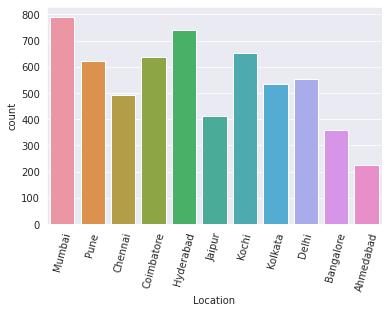

In [19]:
sns.countplot(data=df, x='Location')
plt.xticks(rotation=75)
plt.show()

Observations

1. The locations `Mumbai`, and `Hydebarad` have the highest number of used cars.

2. Followed by cities like `Pune`, `Coimbatore`, and `Kochi` as another group of cities sourcing used cars.

3. Then `Chennai`, `Kolkata`, and `Delhi` looks like are forming another group.

4. And finally a last group with `Jaipur`, `Bangalore`, and `Ahmedabad`.

5. We will evaluate later if this type of groups has any impact in the strategy of pricing used cars by `Cars4U`.

#### **Distribution of values for `Year`**

In [20]:
df['Year'].value_counts()[:3]

2014    797
2015    744
2016    741
Name: Year, dtype: int64

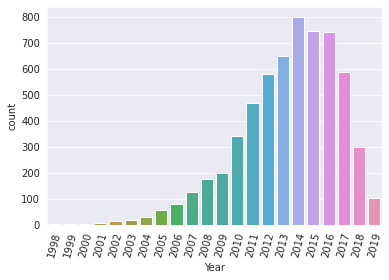

In [21]:
sns.countplot(data=df, x='Year')
plt.xticks(rotation=75)
plt.show()

Observations

1. The majority of cars are basically from years 2010-2018.



#### **Distribution of values for `Kilometers_Driven`**

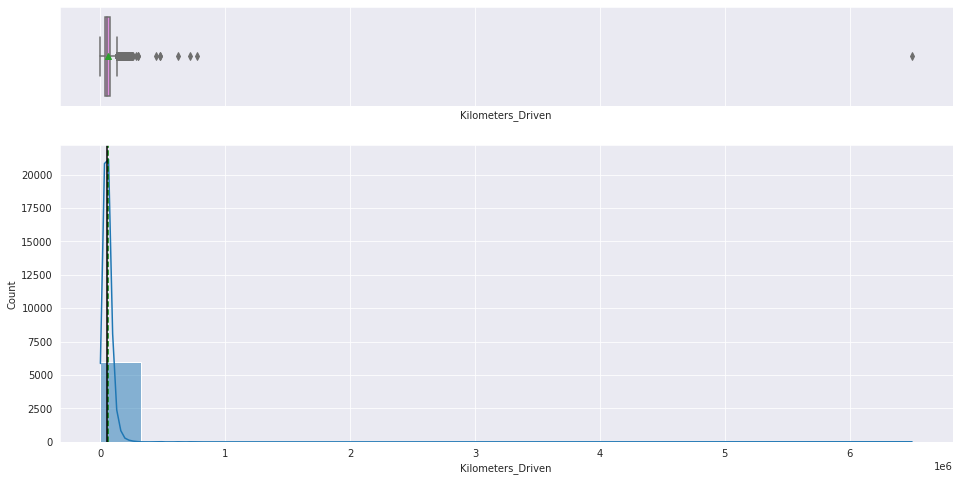

In [22]:
histogram_boxplot(
    data=df, 
    feature='Kilometers_Driven', 
    figsize=(16, 8), 
    kde=True, bins=20)

In [23]:
# find the minimum & maximum values for `Kilometers_Driven`
min(df['Kilometers_Driven']), max(df['Kilometers_Driven'])

(171, 6500000)

In [24]:
# Let's group `Kilometers_Driven` in 4 categories
km_bins = [-np.inf, 100_000, 200_000, 600_000, +np.inf]
km_labels = ['low', 'medium', 'high', 'very_high']
df['Kilometers_Driven_Cat'] = pd.cut(df['Kilometers_Driven'], 
                                     bins=km_bins, 
                                     labels=km_labels, 
                                     ordered=True)

In [25]:
# display the category of `Kilometers_Driven` with very_high values
df.loc[df['Kilometers_Driven_Cat'] == 'very_high', 
       ['Name', 'Year', 'Kilometers_Driven', 'Kilometers_Driven_Cat']]

,Name,Year,Kilometers_Driven,Kilometers_Driven_Cat
340,Skoda Octavia Ambition Plus 2.0 TDI AT,2013,775000,very_high
358,Hyundai i10 Magna 1.2,2009,620000,very_high
1860,Volkswagen Vento Diesel Highline,2013,720000,very_high
2328,BMW X5 xDrive 30d M Sport,2017,6500000,very_high


Observations

1. We observe on the boxplot a high number of `outliers` for this variable.

2. The distribution on the histogram shows a highly right-skewed distribution, obviously due to the presence of those high values in `Kilometers_Driven`.

3. When we do the cut of the values in 4 categories and displaying the rows in the last higher category `very_high` we noticed there is a `weird` value for the `BMW X5 xDrive 30d M Sport	2017` of 6_500_000 kilometers. This is obviously a very high value.

4. We did research of business knowledge about this event and found out the highest possible mileage for a `BMW` is tipically 450_000 miles or 725_000 kilometers.

5. We will drop this row as we suspect there is a extra `zero` added that made this value so extreme. We cannot confirm this assumption with the data owner.

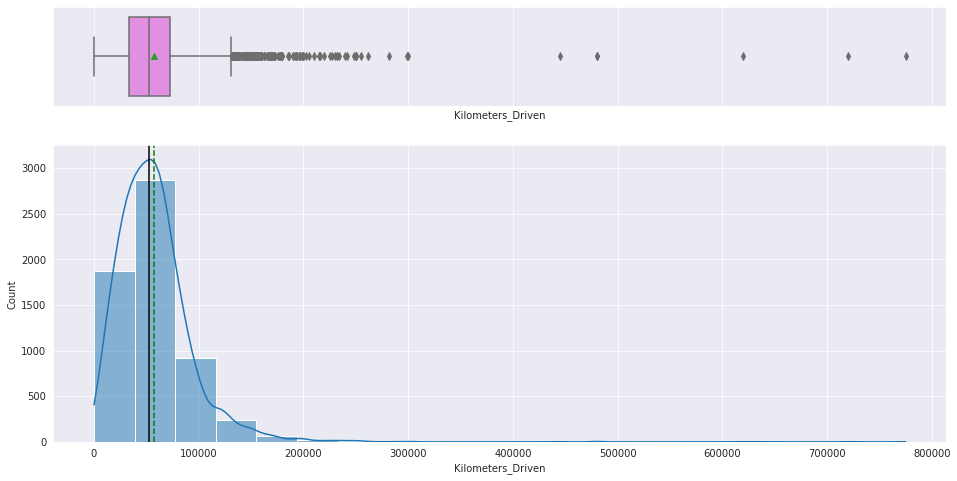

In [26]:
# showing boxplot and histogram with the highest value dropped
histogram_boxplot(
    data=df[df['Kilometers_Driven'] != max(df['Kilometers_Driven'])], 
    feature='Kilometers_Driven', 
    figsize=(16, 8), 
    kde=True, bins=20)

##### Observations

1. The plot although still showing extreme values looks more reasonable after dropping that weird value of 6_500_000.

2. We confirm that we will be dropping this row from the dataset.

In [27]:
# dropping row with highly extreme value on `Kilometers_Driven`
df.drop(axis=0, index=2328, inplace=True)
df[df['Kilometers_Driven_Cat'] == 'very_high']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Kilometers_Driven_Cat
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,25.83,7.5,very_high
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,10.25,2.7,very_high
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,13.23,5.9,very_high


In [28]:
# we don't need this new variable for now. Let's drop it
df.drop(labels=['Kilometers_Driven_Cat'], axis=1, inplace=True)

#### **Distribution of values for `Fuel_Type`**

In [29]:
df['Fuel_Type'].value_counts()

Diesel      3204
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

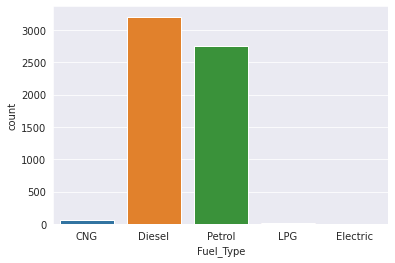

In [30]:
sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0)
plt.show()

Observations
1. Most of the used cars market is dominated by `Diesel` and `Petrol`.

2. We will be grouping `CNG`, `LPG`, and `Electric` under a third category called `Other_Fuels`. 
<p>However, they don't seem to provide too much significance in the used cars market.

In [31]:
# changing `Fuel_Type` not in `Diesel|Petrol` to `Other_Fuels`
df.loc[~df['Fuel_Type'].str.contains('Diesel|Petrol', regex=True), 
       'Fuel_Type'] = 'Other_Fuels'
df['Fuel_Type'].value_counts()

Diesel         3204
Petrol         2746
Other_Fuels      68
Name: Fuel_Type, dtype: int64

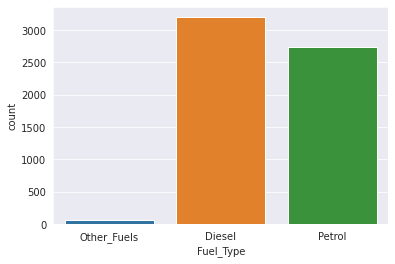

In [32]:
sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0)
plt.show()

#### **Distribution of values for `Transmission`**

In [33]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1719
Name: Transmission, dtype: int64

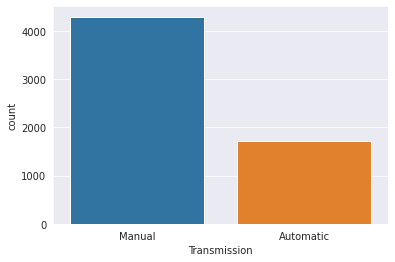

In [34]:
sns.countplot(data=df, x='Transmission')
plt.xticks(rotation=0)
plt.show()

Observations

1. The used cars market is visibly dominated by `Manual` transmission.

#### **Distribution of values for `Owner_Type`**

In [35]:
df['Owner_Type'].value_counts()

First             4928
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

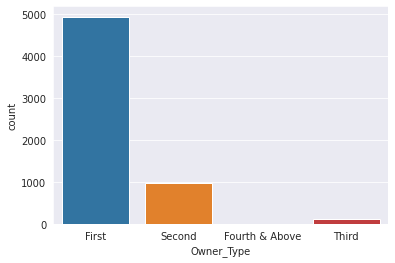

In [36]:
sns.countplot(data=df, x='Owner_Type')
plt.xticks(rotation=0)
plt.show()

Observations

1. The used cars market is highly dominated by cars sourced from `First`-hand owners.

2. We are going to group `Third` and `Fourth & Above` into a new group called `Third & Above` due to the very low number of that kind of categories.

In [37]:
cond = (df['Owner_Type'] == 'Third') | (df['Owner_Type'] == 'Fourth & Above')
print(f'There are {df[cond].shape[0]} previous owners in the category "Third" & "Fourth & Above"')

There are 122 previous owners in the category "Third" & "Fourth & Above"


In [38]:
# grouping 'Third', 'Fourth & Above' into 'Third & Avove'
df.loc[df['Owner_Type'].isin(['Third', 'Fourth & Above']), 'Owner_Type'] = 'Third & Above'

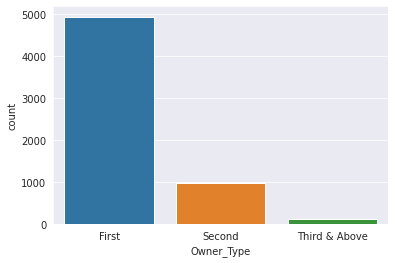

In [39]:
sns.countplot(data=df, x='Owner_Type')
plt.xticks(rotation=0)
plt.show()

#### **Distribution of values for `Mileage`**

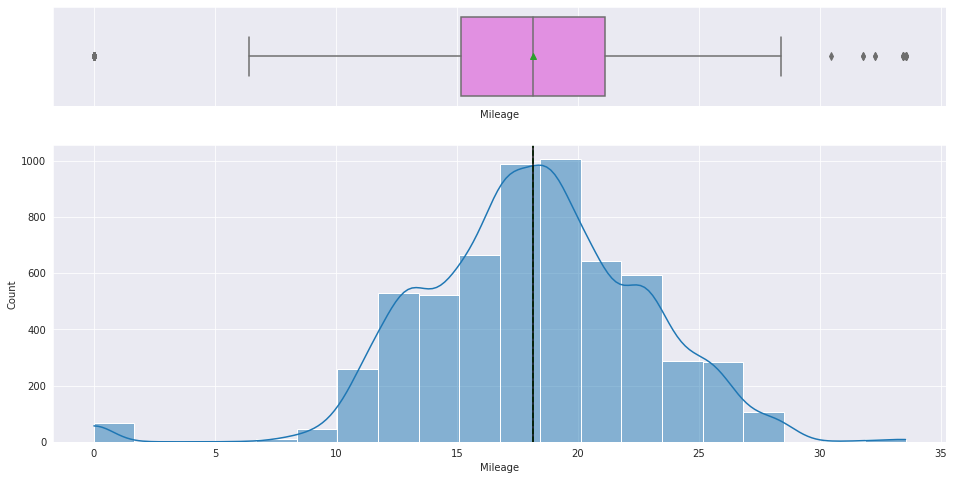

In [40]:
histogram_boxplot(
    data=df, 
    feature='Mileage', 
    figsize=(16, 8), 
    kde=True, bins=20)

Observations

1. The boxplot show a few outliers side by side.

2. The distribution looks pretty gaussian, although has a few humps on both sides of the median which indicates a multi-modal distribution.

#### **Distribution of values for `Engine`**

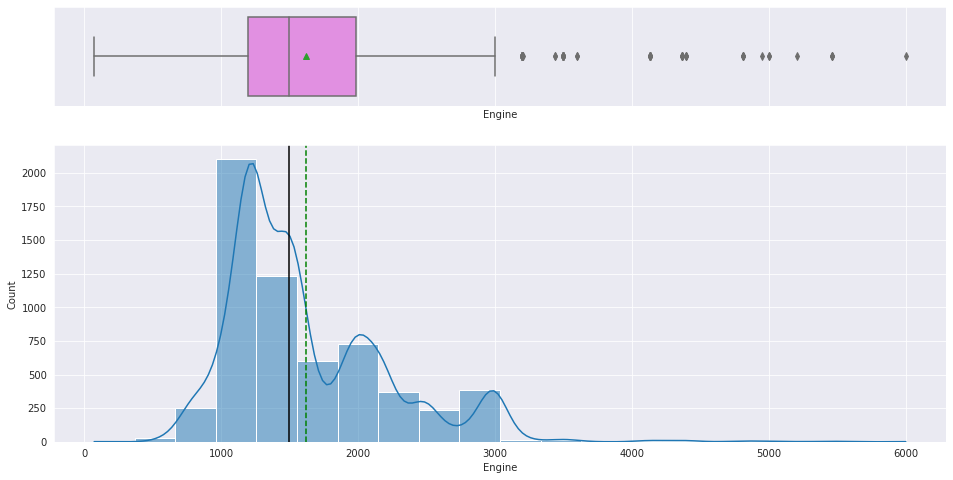

In [41]:
histogram_boxplot(
    data=df, 
    feature='Engine', 
    figsize=(16, 8), 
    kde=True, bins=20)

Observations

1. The bosplot shows a high number of outliers with the mean on the right-side of the median which is an indication of a right-skewed distribtuion.

2. The density line show a few humps as indication of a multi-modal distribution.

#### **Distrbution of values for `Power`**

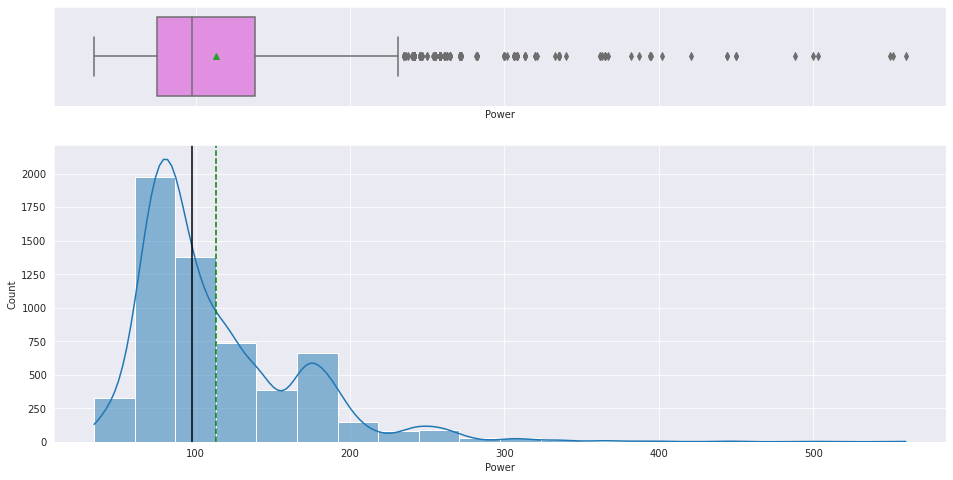

In [42]:
histogram_boxplot(
    data=df, 
    feature='Power', 
    figsize=(16, 8), 
    kde=True, bins=20)

Observations

1. Again, another variable with a higher number of outliers on the right side of the upper whisker. The green triangle (mean) is at the right of the median, indicating a right-skewed distribution.

2. The density line shows a couple of humps as an indication of a multi-modal distribution.

#### **Distribution of values for variable `Price`**

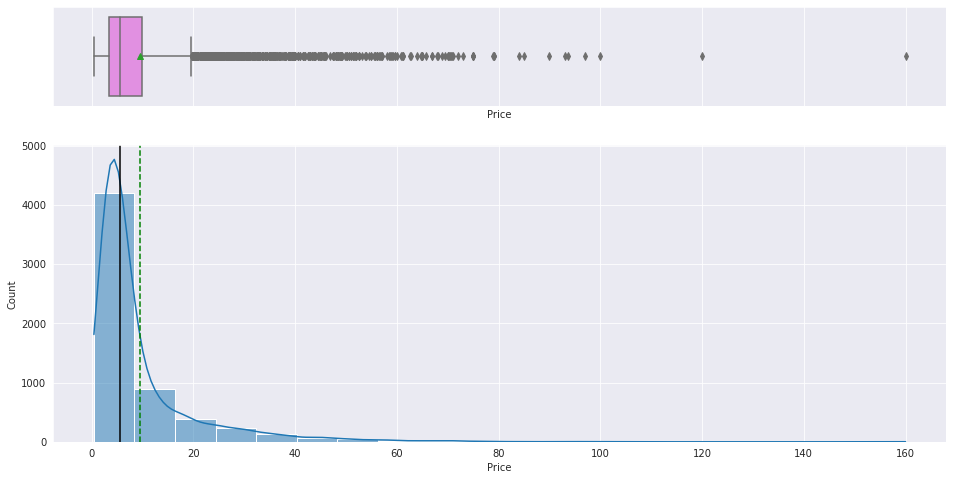

In [43]:
histogram_boxplot(
    data=df, 
    feature='Price', 
    figsize=(16, 8), 
    kde=True, bins=20)

Observations

1. A highly right skewed distribution with a very high number of outliers. The median is almost on the same spot as the 75 percentile in the box plot.

2. The density line doesn't show an apparent number of humps, but is highly skewed to the right.

#### **Distribution of values for variable `New_Price`**

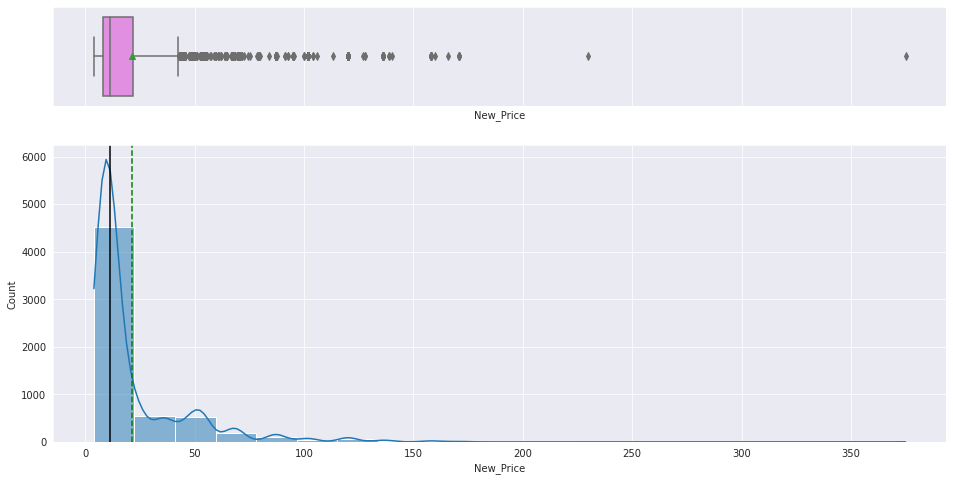

In [44]:
histogram_boxplot(
    data=df, 
    feature='New_Price', 
    figsize=(16, 8), 
    kde=True, bins=20)

Observations

1. A highly right skewed distribution with a very high number of outliers. The median is almost on the same spot as the 75 percentile in the box plot.

2. The density line shows a high number of humps and it is highly skewed to the right.

#### **Let's check the count of each unique category in each of the categorical/object type variables.**

In [45]:
# let's see unique values for columns that has object data type
for column in df.columns:
    if df[column].dtype == object:
        print(f'column: {column}')
        print(df[column].unique(), df[column].nunique())
        print(80 * "-")

column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV'] 1876
--------------------------------------------------------------------------------
column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad'] 11
--------------------------------------------------------------------------------
column: Fuel_Type
['Other_Fuels' 'Diesel' 'Petrol'] 3
--------------------------------------------------------------------------------
column: Transmission
['Manual' 'Automatic'] 2
--------------------------------------------------------------------------------
column: Owner_Type
['First' 'Second' 'Third & Above'] 3
--------------------------------------------------------------------------------


#### **Let's check the NaN values in each of the numerical type variables.**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6018 non-null   object 
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   int64  
 3   Kilometers_Driven  6018 non-null   int64  
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6016 non-null   float64
 8   Engine             5982 non-null   float64
 9   Power              5875 non-null   float64
 10  Seats              5976 non-null   float64
 11  New_Price          6018 non-null   float64
 12  Price              6018 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 787.3+ KB


Observations

1. Only `Mileage`, `Engine`, `Power`, `Seats`, and `Price` have missing values

In [47]:
# let's see number of nan values for columns of numeric data type
for column in df.columns:
    if df[column].dtype != object:
        null_rows = df[df[column].isnull()].shape[0]
        if null_rows:
            print(f'column: [{column}] of type {df[column].dtype} has {null_rows} NaN rows.')
            print(80 * "-")

column: [Mileage] of type float64 has 2 NaN rows.
--------------------------------------------------------------------------------
column: [Engine] of type float64 has 36 NaN rows.
--------------------------------------------------------------------------------
column: [Power] of type float64 has 143 NaN rows.
--------------------------------------------------------------------------------
column: [Seats] of type float64 has 42 NaN rows.
--------------------------------------------------------------------------------


### **Treatment of Missing values for numeric variables**

##### **Temporary variable `Make`**

In [48]:
# let's get the `Make` of each car by extracting first token string from `Name`
df['Make'] = df['Name'].apply(lambda row: row.split()[0].title())
# a temporary variable containing distinct makes
makes = df['Make'].unique()
# display first 4 makes
makes[:4]

array(['Maruti', 'Hyundai', 'Honda', 'Audi'], dtype=object)

##### **1. Treatment of missing values on variable `Mileage`**

In [49]:
# print how many NaNs per Make and the mean of Mileage per Make
for make in makes:
    # impute value
    impute_val = int(df.loc[df.Make == make, 'Mileage'].mean())
    nrows = df[df.Make == make].shape[0]
    null_vals = df.loc[df.Make == make, 'Mileage'].isnull().sum()
    if null_vals:
        print(f'[{make}]: [{null_vals}/{nrows}] NaNs. mean={impute_val}.')

[Toyota]: [1/411] NaNs. mean=14.
[Mahindra]: [1/272] NaNs. mean=15.


1. As this variable is almost symmetric as a Normal distribution and unskewed  we will utilize the mean value to impute the missing values but using the mean per `Make`.

In [50]:
# impute mean value for `Mileage` where make is `Toyota`
cond = (df['Make'] == 'Toyota') & (df['Mileage'].isnull())
df.loc[cond, 'Mileage'] = 14
# impute mean value for `Mileage` where make is `Toyota`
cond = (df['Make'] == 'Mahindra') & (df['Mileage'].isnull())
df.loc[cond, 'Mileage'] = 15

In [51]:
# checking we complete the impute for this variable
df['Mileage'].isnull().sum()

0

##### **2. Treatment of missing values on variable `Engine`**

In [52]:
# print how many NaNs per Make and the median of Engine per Make
makes_to_impute = {}  # stores median to impute per `make` in a dictionary
for make in makes:
    # impute value
    impute_val = df.loc[df.Make == make, 'Engine'].median()
    nrows = df[df.Make == make].shape[0]
    null_vals = df.loc[df.Make == make, 'Engine'].isnull().sum()
    if null_vals:
        print(f'[{make}]: [{null_vals}/{nrows}] NaNs. median={impute_val}.')
        makes_to_impute[make] = impute_val

[Maruti]: [11/1211] NaNs. median=1197.0.
[Hyundai]: [7/1107] NaNs. median=1197.0.
[Honda]: [6/608] NaNs. median=1497.0.
[Toyota]: [1/411] NaNs. median=2494.0.
[Land]: [3/60] NaNs. median=2179.0.
[Bmw]: [5/266] NaNs. median=1995.0.
[Fiat]: [3/28] NaNs. median=1248.0.


1. This variable is highly skewed to the right and is of type numeric.

2. We will impute the median on the missing values as this is a recommended suitable strategy.

In [53]:
# Impute median per Make & Engine
for make, median in makes_to_impute.items():
    cond = (df['Make'] == make) & (df['Engine'].isnull())
    df.loc[cond, 'Engine'] = median

In [54]:
# review we don't have missing values on `Engine`
df['Engine'].isnull().sum()

0

##### **3. Treatment of missing values on variable `Power`**

In [55]:
# print how many NaNs per Make and the mean of Power per Make
makes_to_impute = {}  # stores median to impute per `make` in a dictionary
for make in makes:
    # impute value
    impute_val = df.loc[df.Make == make, 'Power'].median()
    nrows = df[df.Make == make].shape[0]
    null_vals = df.loc[df.Make == make, 'Power'].isnull().sum()
    if null_vals:
        print(f'[{make}]: [{null_vals}/{nrows}] NaNs. median={impute_val}.')
        makes_to_impute[make] = impute_val

[Maruti]: [36/1211] NaNs. median=74.0.
[Hyundai]: [49/1107] NaNs. median=82.0.
[Honda]: [7/608] NaNs. median=98.6.
[Audi]: [1/236] NaNs. median=174.33.
[Nissan]: [2/91] NaNs. median=84.8.
[Toyota]: [16/411] NaNs. median=138.0.
[Volkswagen]: [1/315] NaNs. median=103.2.
[Tata]: [3/186] NaNs. median=74.0.
[Land]: [3/60] NaNs. median=187.7.
[Mercedes-Benz]: [2/318] NaNs. median=185.5.
[Bmw]: [5/266] NaNs. median=190.0.
[Mahindra]: [3/272] NaNs. median=120.0.
[Ford]: [5/300] NaNs. median=89.84.
[Porsche]: [2/18] NaNs. median=300.0.
[Chevrolet]: [1/121] NaNs. median=79.4.
[Skoda]: [1/173] NaNs. median=108.5.
[Fiat]: [5/28] NaNs. median=91.2.
[Smart]: [1/1] NaNs. median=nan.


In [56]:
# removing one observation for `Make` = 'Smart'. 
# We won't be able to impute on this value
# removing key `Smart` from dictionary
del makes_to_impute['Smart']
# remove observation from dataset
indices = df[df['Make'] == 'Smart'].index
df.drop(axis=0, index=indices, inplace=True)

1. This variable is also right skewed numeric. We will impute values on the missing cells using the median per `Make`

In [57]:
# Impute median per Make & Power
for make, median in makes_to_impute.items():
    cond = (df['Make'] == make) & (df['Power'].isnull())
    df.loc[cond, 'Power'] = median

In [58]:
# review we don't have missing values on `Power`
df['Power'].isnull().sum()  

0

In [59]:
# update variable `makes`
makes = df['Make'].unique()

##### **4. Treatment of missing values on variable `Seats`**

In [60]:
# print how many NaNs per Brand and the mode of Seats per Brand
makes_to_impute = {}  # stores mode to impute per `make` in a dictionary
for make in makes:
    impute_val = df.loc[df.Make == make, 'Seats'].mode()[0]
    nrows = df[df.Make == make].shape[0]
    null_vals = df.loc[df.Make == make, 'Seats'].isnull().sum()
    if null_vals:
        print(f'[{make}]: [{null_vals}/{nrows}] NaNs. mode={impute_val}.')
        makes_to_impute[make] = impute_val

[Maruti]: [14/1211] NaNs. mode=5.0.
[Hyundai]: [7/1107] NaNs. mode=5.0.
[Honda]: [7/608] NaNs. mode=5.0.
[Toyota]: [1/411] NaNs. mode=7.0.
[Land]: [3/60] NaNs. mode=5.0.
[Bmw]: [5/266] NaNs. mode=5.0.
[Ford]: [2/300] NaNs. mode=5.0.
[Fiat]: [3/28] NaNs. mode=5.0.


In [61]:
cond = (df['Make'] == 'Toyota') & (df['Seats'].isnull())
df[cond]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.3,2494.0,138.0,NaN,8.525,2.95,Toyota


1. As we can see the `Make` = Toyota have a mode of 7 seats but only for one observation. 

2. After doing a quick business research we find out the `Toyota Eios Liva` has actually 5 seats.

3. We will use then the mode of 5 `seats` to populate the missing values in `Seats`.

In [62]:
# update actual seats for the `Toyota Etios Liva` to be `5`.
makes_to_impute['Toyota'] = 5

In [63]:
# Impute mode per Make & Seats using the dictionary
for make, mode in makes_to_impute.items():
    cond = (df['Make'] == make) & (df['Seats'].isnull())
    df.loc[cond, 'Seats'] = mode

In [64]:
# checking we complete the impute for this variable
df['Seats'].isnull().sum()

0

##### **5. Treatment of missing values on variable `Price`**

In [65]:
df[df['Price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make


1. This variable is also highly right skewed and numeric. 
2. This is the target variable. It is generally preferred to drop the missing values in the target variable. We actually did it in this case as a best practice.

In [66]:
# checking we have no missing values for this variable
df['Price'].isnull().sum()

0

### **Review the existence of duplicated rows**

In [67]:
df[df.duplicated(keep=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make


There are no duplicated rows in the dataset.

### **Statistical Summary for all columns in the dataset**
Let's analyze the statistical summary for all columns in the dataset.

In [68]:
df.describe(include='all').T 
# setting include='all' will get the statistical summary for both the numerical and categorical variables.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6017,1875,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6017,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6017.0,NaN,NaN,NaN,2013.358484,3.269219,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6017.0,NaN,NaN,NaN,57660.513711,37877.421626,171.0,34000.0,53000.0,73000.0,775000.0
Fuel_Type,6017,3,Diesel,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6017,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6017,3,First,4928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017.0,NaN,NaN,NaN,18.137126,4.576724,0.0,15.17,18.15,21.1,33.54
Engine,6017.0,NaN,NaN,NaN,1620.339538,600.149633,72.0,1197.0,1493.0,1984.0,5998.0
Power,6017.0,NaN,NaN,NaN,112.913985,53.606712,34.2,75.0,93.7,138.1,560.0


### **Bivariate Analysis**

By using a Bivariate Analysis we are trying to understand the relationship between two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

**Let us plot bivariate charts between variables to understand their interaction with each other.**

#### **Correlation by Heatmap**


A **heatmap** is a graphical representation of data as a color-encoded matrix. It is a great way of representing  the correlation for each pair of columns in the data.The *heatmap()* function of seaborn helps us to create such a plot.

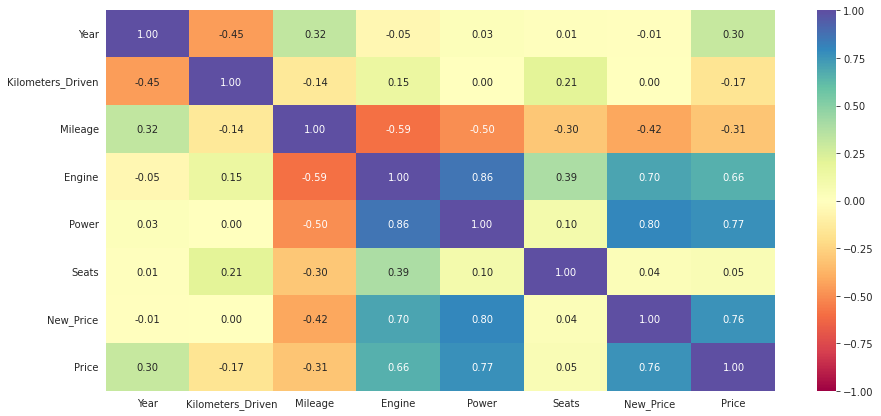

In [69]:
# Check for correlation among numerical variables
num_var = ['Year', 'Kilometers_Driven', 'Mileage', 
           'Engine', 'Power', 'Seats', 'New_Price', 'Price']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:

- *`Year` is inverse correlated to `Kilometers_Driven` which is a match with logic. A less aged used car tends to have less `Kilometers_Driven`. This is appetite for customers.*

- *The highest positive pair of correlated variables are `Power` and `Engine` with 86%. This is also expected. A bigger `Engine` can hold more capacity for combustion and therefore more `Power` for displacement.*

- *As a consequence of the previous the next couple of highly positive correlated variables are `Power`, `Engine`, `Price`, and `New_Price`.*

- *Of course `New_Price`, and `Price` are also positively correlated.*

- *Interesting to know that as a fact `New_Price` is not correlated at all with `Kilometers_Driven`.*

- *These pair of variables `Year` & `New_Price`, `Seats` & `Power`, `Seats` & `Price` (remember mode was almost 5 for all used cars regardless of `Make`) are very low correlated.*

- *It is important to note that correlation does not imply causation.*


#### **Bivariate Scatter Plots**

A **scatterplot** displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis.

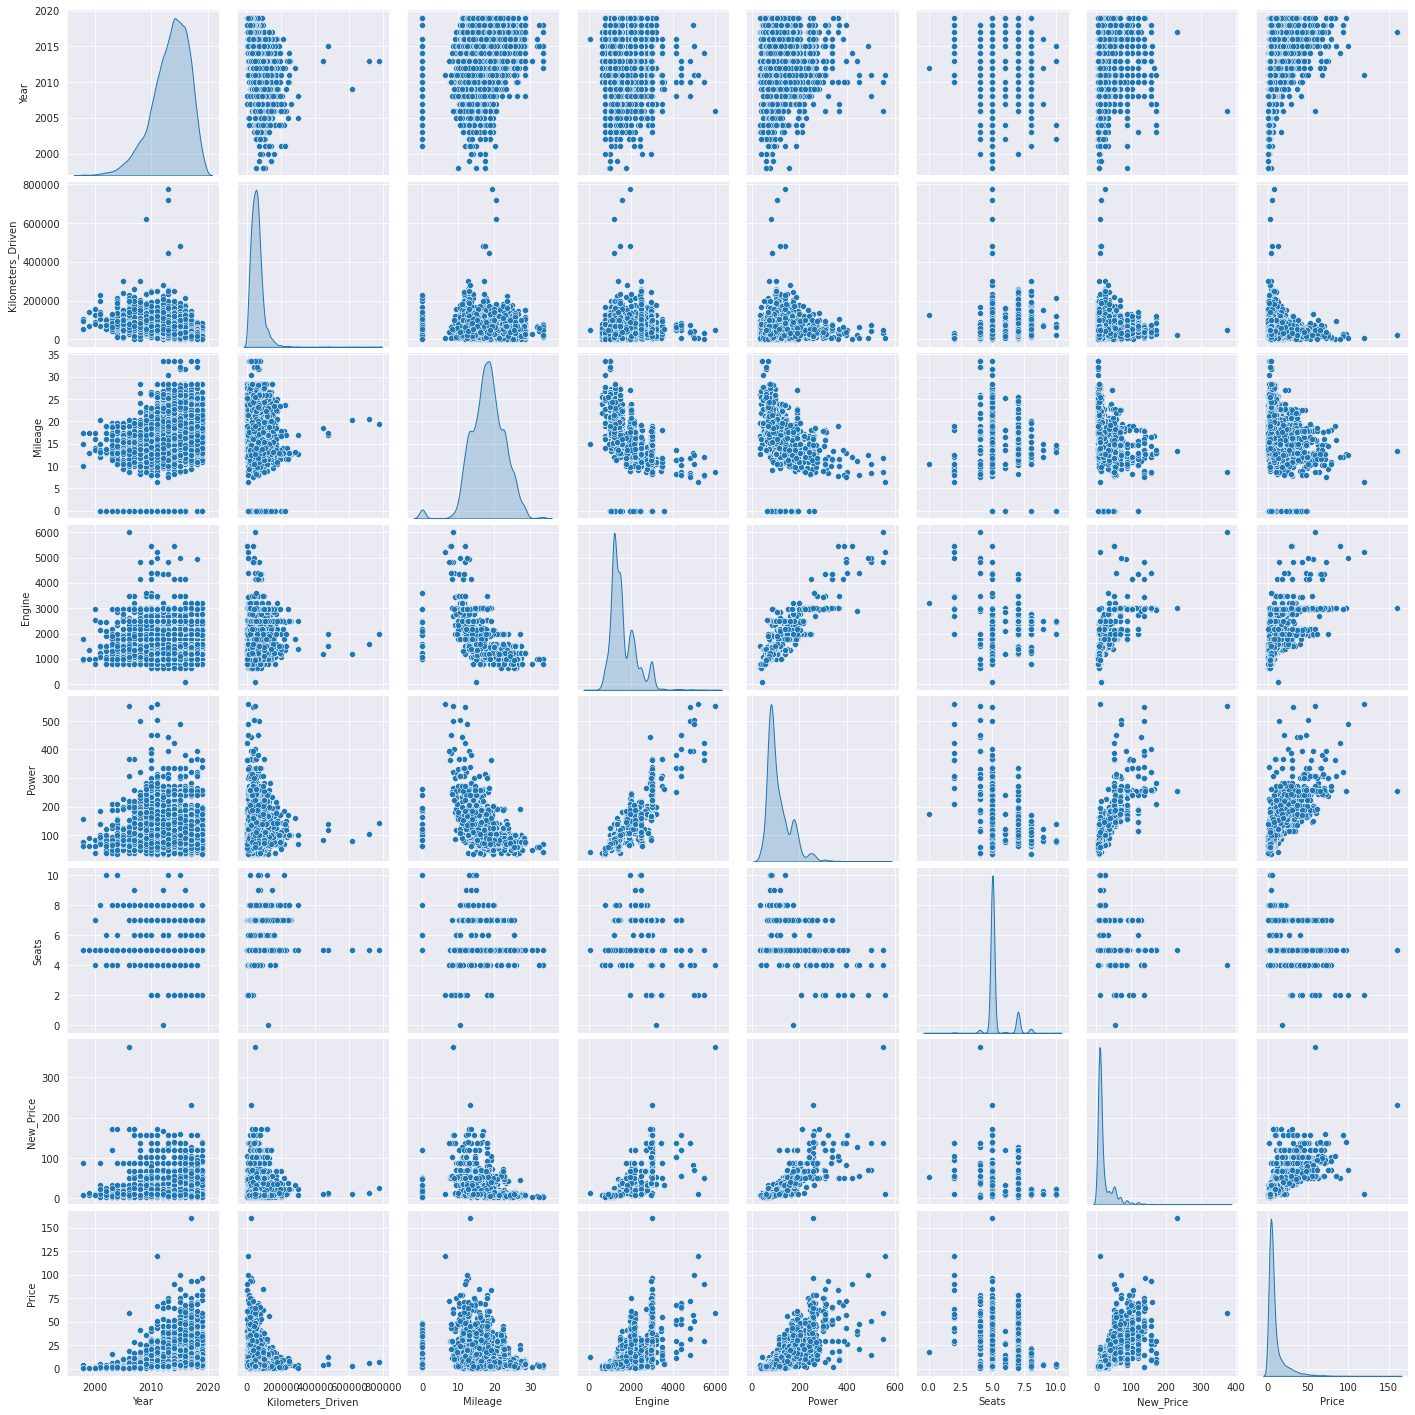

In [70]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

Note: 

- *Pair plot from seaborn can help corrobore the statements we have expressed before using the correlation matrix in a more graphical way. So we confirm the same insights as from the correlation plot.*

- *`Price` and `New_Price` are clustered around a particular region in the plot with a few outliers out of the group.*

- *We also noted that `Mileage` & `Engine` and `Mileage` & `Power` shows a non-linear inverse correlation.*

#### Now let's check the trend between pickups across different pair of  variables combinations

#### **`Price` across `Location`**

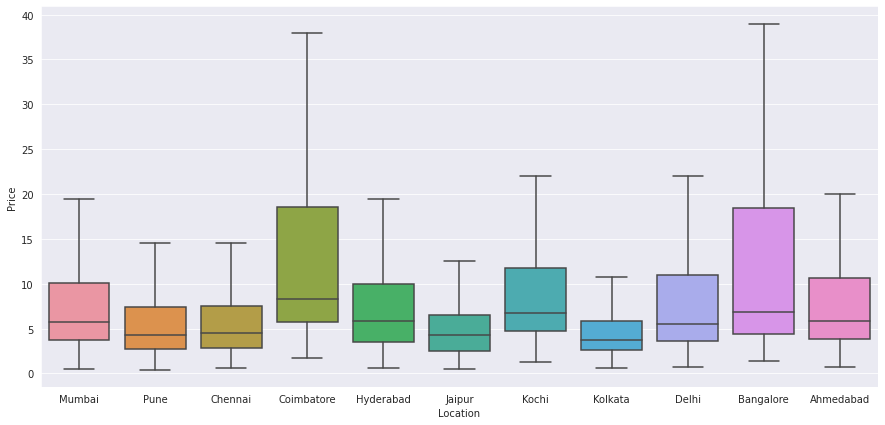

In [71]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Location'], y=df['Price'], showfliers = False)
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

Observations
- *On the set of boxplot the median `Price` for **Coimbatore** and **Bangalore** are the highest values. These cities share a behaviour of a highest spread in IQR, indicating dispersity of data away from the median on the top quartile. This indicate high presence of outliers.*
- *Median values for **Pune**, **Chennai**, **Jaipur**, and **Kolkata** are similar. And these cities share a similar IQR range and lower that the 2 cities in the previous paragraph. This may indicate presence of a good `cluster` of observations around the `median` and within the IQR.*
- *Cities like **Mumbai**, **Hyderabad**, and **Delhi** have also a similar median and a relative same spread in IQR.*

#### **`Price` across `Year`**

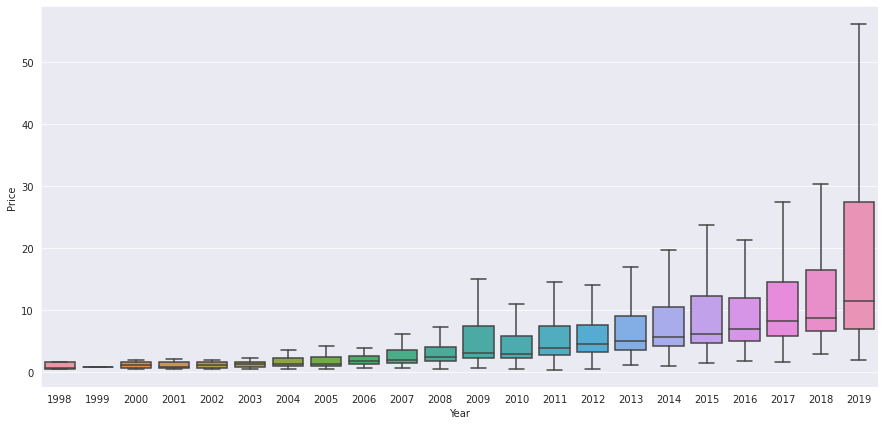

In [72]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Year'], y=df['Price'], showfliers=False)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Observations
- *While the used cars are `'newer'` their spread in `Price` is bigger. This is room for negotiation for the dealership to get a better price than with `'elder'` user cars.*

#### **`Price` across `Fuel_Type`**

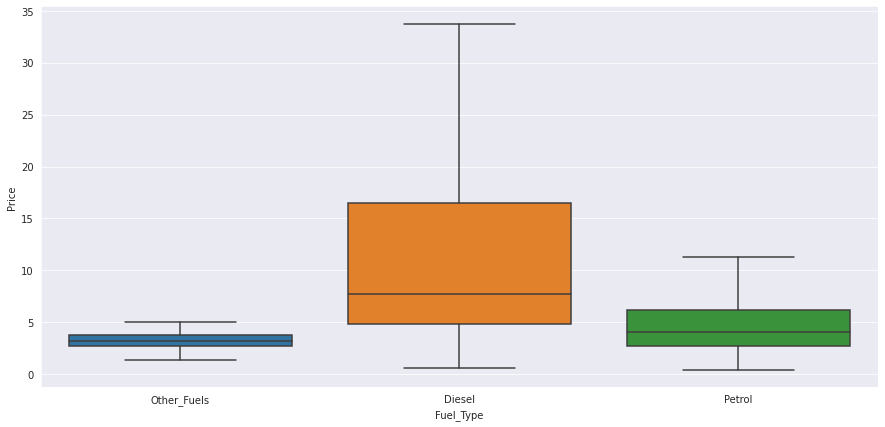

In [73]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Fuel_Type'], y=df['Price'], showfliers = False)
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.show()

Observations
- *Distribution of `Price` for `Diesel` cars is very spread and skewed to the right (top whisker).*
- *The margin of `Price` values for `Petrol` based cars is narrower than with `Diesel` based cars.*
- *The distribution of `Price` for `Other Fuels` is fairly Normal and with very narrow margin of `Price` values.*

#### **`Price` across `Owner_Type`**

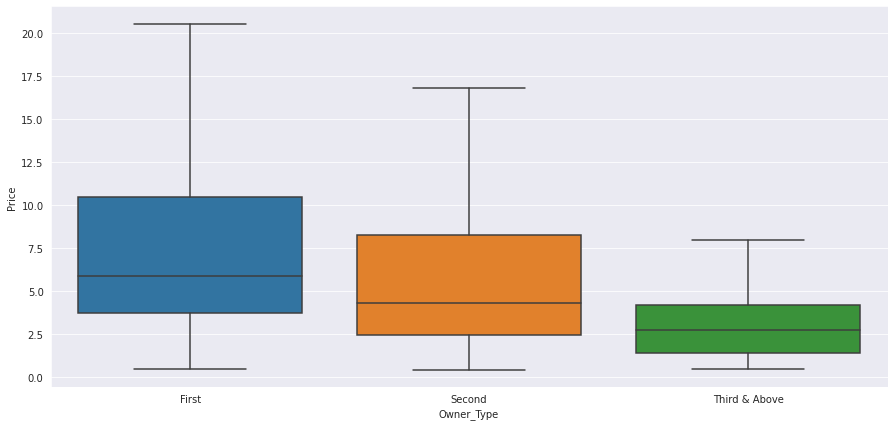

In [74]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Owner_Type'], y=df['Price'], showfliers = False)
plt.xlabel('Owner_Type')
plt.ylabel('Price')
plt.show()

Observations
- *For `First` hand owners the median `Price` and spread (IQR range) is higher. This is normally expected in this market.*
- *For the `Second` hand owners the median price decrease but still competitive with median from `First` hand owners.*
- *The group for `Third & Above` owners has the lowest median value and a narrower spread. Not too much room for negotiation on the `Price` as we can see.*

#### **Relationship between `Owner_Type` and `Mileage`**

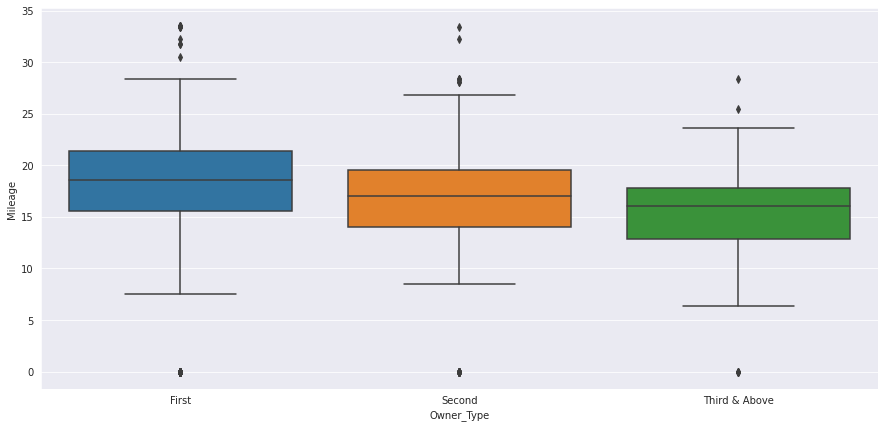

In [75]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Owner_Type'], y=df['Mileage'], showfliers = True)
plt.xlabel('Owner_Type')
plt.ylabel('Mileage')
plt.show()

Observations
- *`Price` and `Mileage` share an analogous behaviour but an smaller spread in the case of `Mileage`*
- *The median of `Mileage` goes from higher to lower on `First`, `Second` and `Third & Above` respectively, but with median stays always within 15 - 20 Kms.*  

#### **Relationship between `Seats` and `Power`**

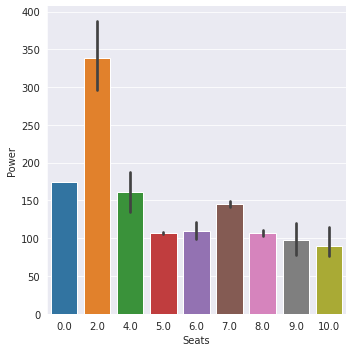

In [76]:
sns.catplot(x='Seats', y='Power', data=df, kind="bar")
plt.show()

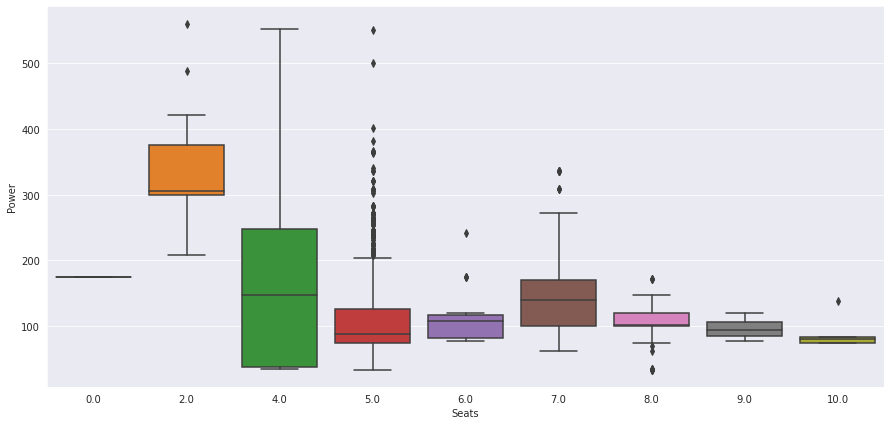

In [77]:
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Seats'], y=df['Power'], showfliers = True)
plt.xlabel('Seats')
plt.ylabel('Power')
plt.show()

In [78]:
# investigating the car with 0 seats
df[df['Seats'] < 2]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,174.33,0.0,53.14,18.0,Audi


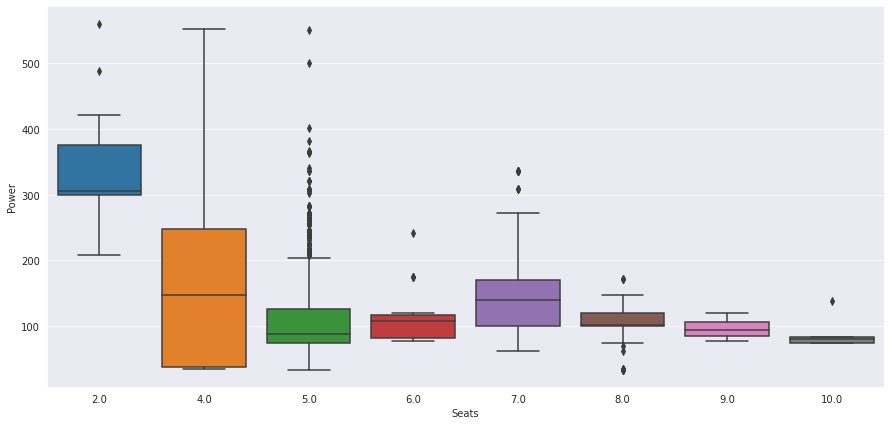

In [79]:
# after a quick research we find out the model has actually 5 seats
# so we are going to fix this observation using business knowledge
df.loc[[3999], 'Seats'] = 5

# let's plot this again
plt.figure(figsize=(15,7))           
sns.boxplot(x=df['Seats'], y=df['Power'], showfliers = True)
plt.xlabel('Seats')
plt.ylabel('Power')
plt.show()

Observations

- *Cars with 4-seats are more popular. They don't show any visible outliers and their median `Power` is around 150.*

- *Cars with 2-seats seems to have more power. These cars may be sport cars.*

- *Cars wit 5-setas and beyond have a median `Power` between 90-140.*

### **Multivariate Analysis**

We will use a `'catplot'` type of plot in a multivariate analysis from seaborn.

A `'catplot'` shows the relationship between a numerical and one or more categorical variables.

#### **Relationship between `Seats` and `Engine`, and `Owner_Type`**

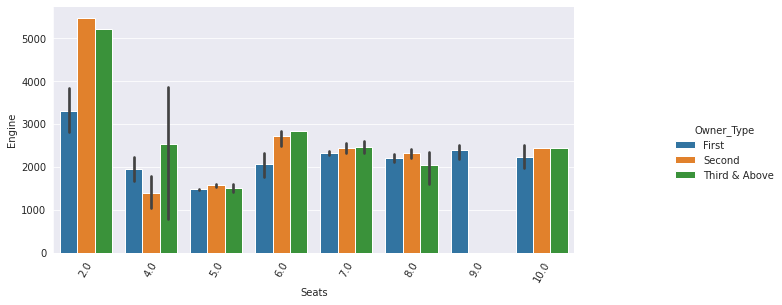

In [80]:
g = sns.catplot(x='Seats', y='Engine', data=df, kind="bar", hue='Owner_Type')

g.fig.set_figwidth(12)
g.fig.set_figheight(4)

plt.xticks(rotation=60)
plt.show()

Observations

- *`Engine` values for 2-seats cars are bigger (sports cars?) therefore more room for `Power` (closely correlated variable).*

- *For a 4- and 5-seats cars (leisure cars?) with an `Engine` value from 1,000-2,000. This is inline with this type of cars.*

- *For the 4-seats cars with `Third & Above` type of `Owner_Type` the spread is higher, maybe because those are old cars and less efficient cars from the past.*

In [81]:
# observations showing the third bullet point above
df[(df['Owner_Type'] == 'Third & Above') & (df['Seats'] == 4)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
375,Maruti 800 AC,Chennai,2007,72000,Petrol,Manual,Third & Above,16.1,796.0,37.0,4.0,7.88,1.00,Maruti
1837,Chevrolet Cruze LTZ AT,Pune,2009,73204,Diesel,Automatic,Third & Above,18.1,1991.0,147.9,4.0,11.30,3.50,Chevrolet
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third & Above,8.0,4806.0,394.3,4.0,136.00,42.91,Porsche


#### **Relationship between `Location`, `Kilometers_Driven`, and `Owner_Type`**

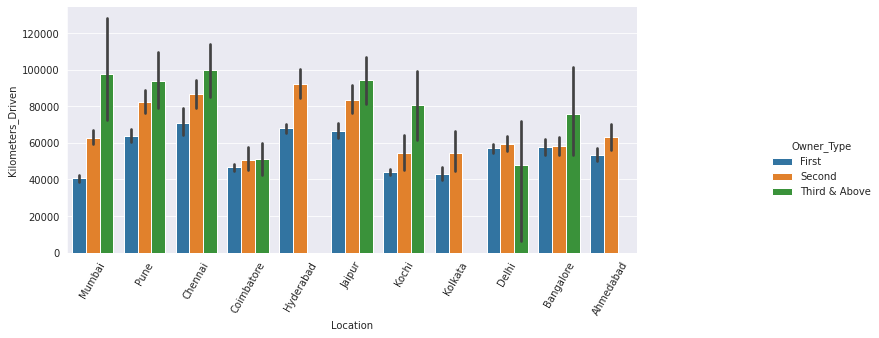

In [82]:
g = sns.catplot(x='Location', y='Kilometers_Driven', data=df, kind="bar", hue='Owner_Type')

g.fig.set_figwidth(14)
g.fig.set_figheight(4)

plt.xticks(rotation=60)
plt.show()

Observations

- *The `Kilometers_Driven` for ownership `First` are fairly similar accross all cities, although we see slight higher values on cities like **Pune**, **Chennai**, **Hyderabad**, and **Jaipur**.*

- *The `Kilometers_Driven` are similar between cities **Mumbai**, **Pune**, **Chennai**, and **Jaipur** for the ownership `Third & Above`.*

#### **Relationship between `Fuel_Type`, `Kilometers_Driven`, and `Owner_Type`**

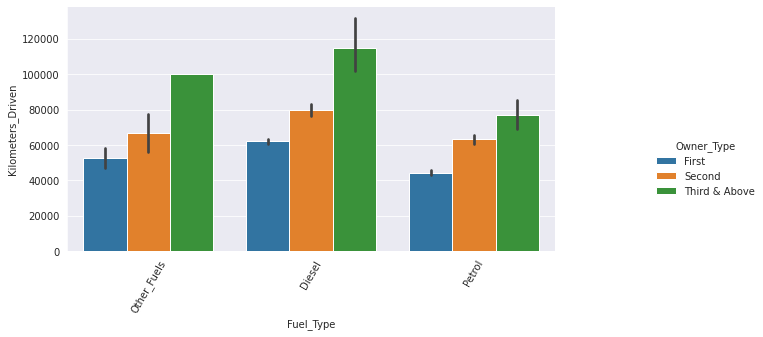

In [83]:
g = sns.catplot(x='Fuel_Type', y='Kilometers_Driven', data=df, kind="bar", hue='Owner_Type')

g.fig.set_figwidth(12)
g.fig.set_figheight(4)

plt.xticks(rotation=60)
plt.show()

Observations
- *Higher values of `Kilometers_Driven` on the cars with `Diesel` and `Other_Fuels` for the `Owner_Type` = `Third & Above`, but with a higher dispersion on the `Diesel` category.*
- *For the cars on `Second` hand the `Kilometers_Driven` span from 60,000-80,000 on `Diesel`.*
- *For cars on `First` hand use we found `Kilometers_Driven` on a lower range from 40,000-60,000. on `Petrol` and `Other_Fuels`.*

#### **Relationship between `Seats`, `Kilometers_Driven`, and `Fuel_Type`**

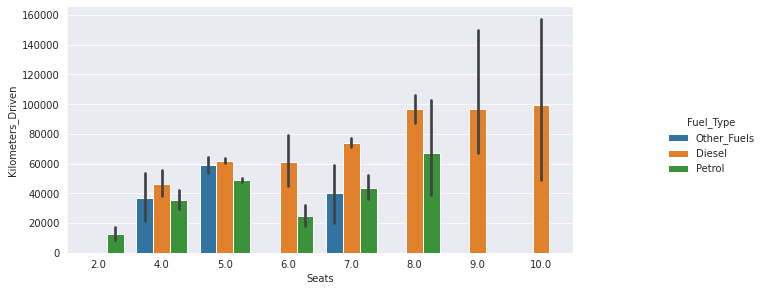

In [84]:
g = sns.catplot(x='Seats', y='Kilometers_Driven', data=df, kind="bar", hue='Fuel_Type')

g.fig.set_figwidth(12)
g.fig.set_figheight(4)

# plt.xticks(rotation=0)
plt.show()

Observations

- *`Diesel` cars type of fuel are tipycally used from 4-`Seats` and beyond with a higher dispersion on 9-`Seats` and 10-`Seats`.*

- *`Petrol` is used only on 2-`Seats` cars. `Other_Fuels` are used only on 4, 5, and 7-`Seats`.*

### **Outlier Detection and Treatment**

**Let's visualize all the outliers present in data together**

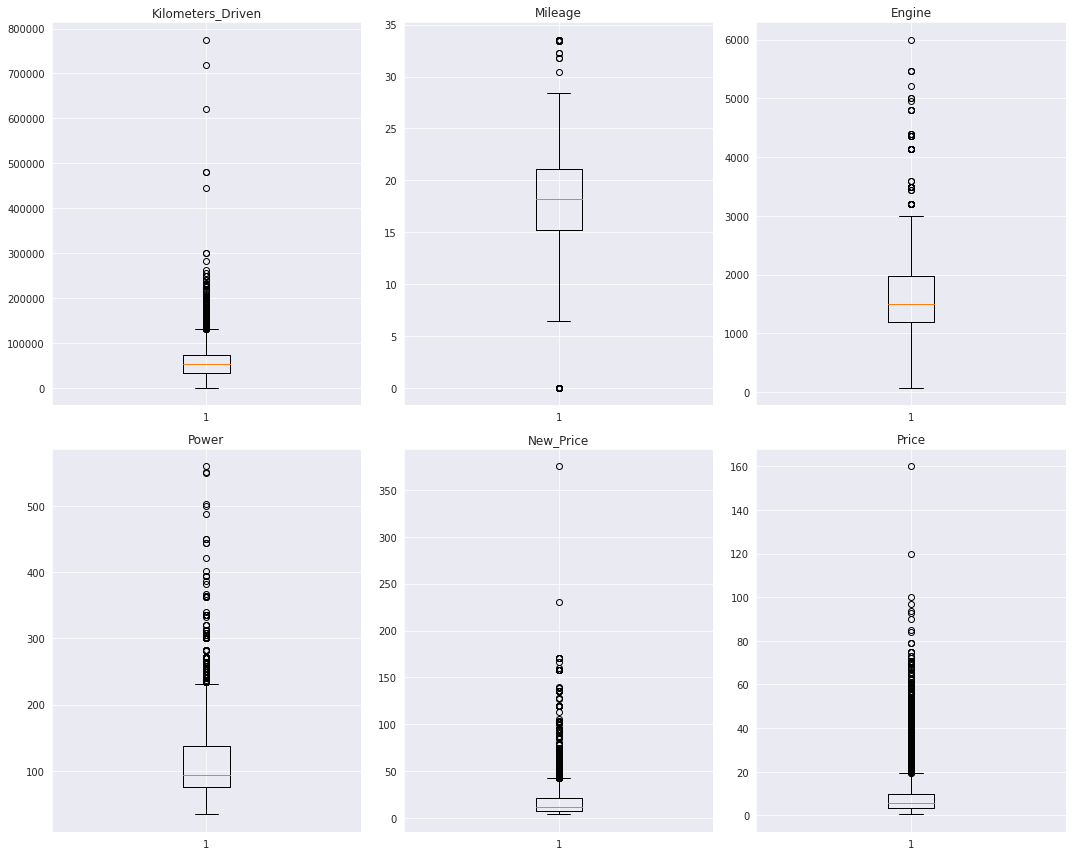

In [85]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 
                   'New_Price', 'Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [86]:
def get_outliers(df, variable):
    p25, p50, p75 = values = df[variable].describe().to_numpy()[-4:-1].tolist()
    iqr = p75 - p25
    loww = p25 - iqr * 1.5
    uppw = p75 + iqr * 1.5
    filt = (df[variable] > uppw) | (df[variable] < loww)
    return df.loc[filt, variable].tolist()

- *All of the numeric columns shows a bunch of outliers.*
- *However, we will be looking at how realistic or not are those outliers in the context of the data we have at hand. We will be using a python function (**get_outliers**) to get a list of the outliers found on the numerical variables. We will take then after our own conclusions to see if we need to do outliers treatment or not.*


#### Outliers on **Kilometers_Driven**

In [87]:
print(np.sort(get_outliers(df, 'Kilometers_Driven')))

[131765 132000 132000 132000 132000 133000 133000 133944 134000 135000
 135000 135000 135000 135000 135000 135000 135000 135670 136000 136000
 136490 136642 136997 137000 137000 137000 137008 137148 137800 138000
 138000 138000 138000 138205 139000 140000 140000 140000 140000 140000
 140000 140000 140000 140000 141537 142000 142000 143000 143017 143143
 143275 143354 144000 144000 144113 144400 144471 145000 145000 145000
 145277 146000 146000 146300 146824 147000 147350 147848 147898 148000
 148000 148000 148009 149000 149706 150000 150000 150000 150000 150000
 150000 150000 150000 150000 150000 150000 150000 150000 150000 150000
 150386 151000 152000 152000 152000 152633 153000 154000 155000 155000
 155566 156000 156056 156210 156347 157000 158000 158000 158793 160000
 160000 160000 160000 160000 160000 160000 160000 160000 160538 162000
 162663 163000 165000 166000 166194 167000 167000 167362 168000 168205
 169000 169000 169006 170000 170000 170000 170000 170000 170428 171000
 17205

- *Those numbers for `Kilometers_Driven` looks realistic. No outlier treatment needed.*

#### Outliers on **Mileage**

In [88]:
print(np.sort(get_outliers(df, 'Mileage')))

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   30.46 31.79 31.79 32.26 32.26
 33.44 33.44 33.44 33.44 33.54 33.54 33.54 33.54 33.54]


In [89]:
print(f"There are {df[df['Mileage'] == 0].shape[0]} cars with no-mileage.")

There are 67 cars with no-mileage.


- Those numbers for `Mileage` also looks realistic. No outlier treatment needed.

#### Outliers on **Engine**

In [90]:
print(np.sort(get_outliers(df, 'Engine')))

[3197. 3198. 3198. 3198. 3198. 3198. 3198. 3198. 3198. 3198. 3198. 3198.
 3198. 3198. 3198. 3198. 3200. 3436. 3436. 3498. 3498. 3498. 3498. 3498.
 3498. 3498. 3498. 3498. 3498. 3498. 3498. 3597. 3597. 4134. 4134. 4134.
 4134. 4134. 4134. 4134. 4134. 4367. 4367. 4367. 4367. 4367. 4395. 4395.
 4395. 4806. 4806. 4806. 4806. 4951. 5000. 5000. 5204. 5461. 5461. 5461.
 5998.]


- No outlier tratment required as they looks realistic numbers for engines in `cubic centimeters`.

#### Outliers on **Power**

In [91]:
print(np.sort(get_outliers(df, 'Power')))

[235.   235.   235.   235.   235.   235.   235.   235.   235.   236.
 237.4  240.   240.   241.   241.   241.   241.38 241.38 241.38 241.38
 241.38 241.38 241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4
 241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4
 241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4
 241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4  241.4
 241.4  241.4  245.   245.   245.   245.   245.   245.   245.   245.
 245.   245.   245.   245.   245.   246.7  246.7  246.74 250.   250.
 254.   254.79 254.79 254.79 254.79 254.79 254.79 254.79 254.79 254.8
 254.8  254.8  254.8  254.8  254.8  254.8  255.   255.   255.   255.
 255.   255.   258.   258.   258.   258.   258.   258.   258.   258.
 258.   258.   258.   258.   258.   258.   258.   258.   258.   258.
 258.   258.   258.   258.   258.   258.   258.   258.   258.   258.
 258.   258.   258.   258.   258.   258.   258.   258.   258.   261.
 261.49 261.49 261.5  262.6

- No outlier treatment required.

### Visualizing a Sample of the data

In [92]:
# let's view a sample of the data
df.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4932,Hyundai Grand i10 CRDi Sportz,Kochi,2014,51134,Diesel,Manual,First,24.00,1120.0,70.00,5.0,7.45,4.72,Hyundai
4760,Maruti Ciaz 1.3 Alpha,Kochi,2018,39023,Diesel,Manual,First,28.09,1248.0,88.50,5.0,11.11,9.48,Maruti
5747,Maruti Wagon R LXI CNG,Delhi,2014,62549,Other_Fuels,Manual,First,26.60,998.0,58.16,5.0,5.51,2.95,Maruti
4563,Maruti Wagon R VXI,Mumbai,2014,43628,Petrol,Manual,First,22.50,998.0,67.04,5.0,5.61,3.16,Maruti
3830,Toyota Fortuner 4x2 AT,Delhi,2014,79000,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,37.17,17.75,Toyota
265,Mercedes-Benz New C-Class C 220 CDI CLASSIC,Bangalore,2014,57000,Diesel,Manual,Second,15.80,2148.0,170.00,5.0,49.49,18.00,Mercedes-Benz
213,Hyundai Creta 1.6 VTVT S,Delhi,2015,27057,Petrol,Manual,Second,15.29,1591.0,121.30,5.0,16.06,8.15,Hyundai
5459,Mercedes-Benz E-Class Facelift,Bangalore,2014,28000,Diesel,Automatic,First,13.00,2987.0,258.00,5.0,86.97,31.75,Mercedes-Benz
4791,Mitsubishi Lancer GLXD,Chennai,2003,125000,Diesel,Manual,Third & Above,14.80,1998.0,68.00,5.0,33.21,3.00,Mitsubishi
2013,Hyundai Grand i10 1.2 Kappa Magna AT,Kochi,2018,5354,Petrol,Automatic,First,18.90,1197.0,81.86,5.0,7.37,6.76,Hyundai


In [93]:
# create a copy on disk of the data after EDA
df.to_csv(project_folder + '/used_cars_data_post_EDA.csv', index=False)
# removing temporary variable `Make`, and variable `Name`
df.drop(labels=['Name', 'Make'], axis=1, inplace=True)

In [94]:
df.sample(
    10, random_state=2
)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4932,Kochi,2014,51134,Diesel,Manual,First,24.00,1120.0,70.00,5.0,7.45,4.72
4760,Kochi,2018,39023,Diesel,Manual,First,28.09,1248.0,88.50,5.0,11.11,9.48
5747,Delhi,2014,62549,Other_Fuels,Manual,First,26.60,998.0,58.16,5.0,5.51,2.95
4563,Mumbai,2014,43628,Petrol,Manual,First,22.50,998.0,67.04,5.0,5.61,3.16
3830,Delhi,2014,79000,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,37.17,17.75
265,Bangalore,2014,57000,Diesel,Manual,Second,15.80,2148.0,170.00,5.0,49.49,18.00
213,Delhi,2015,27057,Petrol,Manual,Second,15.29,1591.0,121.30,5.0,16.06,8.15
5459,Bangalore,2014,28000,Diesel,Automatic,First,13.00,2987.0,258.00,5.0,86.97,31.75
4791,Chennai,2003,125000,Diesel,Manual,Third & Above,14.80,1998.0,68.00,5.0,33.21,3.00
2013,Kochi,2018,5354,Petrol,Automatic,First,18.90,1197.0,81.86,5.0,7.37,6.76


### <a id='link1'>Summary of EDA</a>

**Data Description**

- The target variable (`Price`) is of *float* type.
- The `S.No.` column is not required. It's the same as the index of the DataFrame.
- There are many NaN values in the target column `Price`. We will remove those rows.
- There was one duplicated row in the dataset.
- There are a lot of missing values in the data.
- The dataset initially contains 7,253 rows x 14 columns.
- The dataset has 6019 rows and 13 columns after removin NaNs from Price and the column `S.No.`.


**Data Cleaning**

- The columns `Mileage`, `Engine`, `Power`, and `Seats` have missing values and they are of type numeric. Although those columns were given as text due to added units within the column.

- We dealt with those columns by removing the units and possibly converting them to type of numeric.

- The attributes `Fuel_Type`, `Transmission`, and `Owner_Type`, are of object type columns.


**Observations from EDA**

- The locations `Mumbai`, and `Hydebarad` have the highest number of used cars.

- Followed by cities like `Pune`, `Coimbatore`, and `Kochi` as another group of cities sourcing used cars.

- Then `Chennai`, `Kolkata`, and `Delhi` looks like are forming another group.

- And finally a last group with `Jaipur`, `Bangalore`, and `Ahmedabad`.

- We will evaluate later if this type of groups has any impact in the strategy of pricing used cars by `Cars4U`.

- The majority of cars are basically from years 2010-2018.

- We foud an extreme value in `Kilometers_Driven` that was removed as the complete row.

- Most of the used cars market is dominated by `Diesel` and `Petrol`.

- We will be grouping `CNG`, `LPG`, and `Electric` under a third category called `Other_Fuels`. 
<p>However, they don't seem to provide too much significance in the used cars market.

- The used cars market is visibly dominated by `Manual` transmission.

- The used cars market is highly dominated by cars sourced from `First`-hand owners.

- We are going to group `Third` and `Fourth & Above` into a new group called `Third & Above` due to the very low number of that kind of categories.

- The distribution density for `Mileage` looks pretty gaussian, although has a few humps on both sides of the median which indicates a multi-modal distribution.

- The distribution density on `Engine` shows a few humps as indication of a multi-modal distribution.

- The variable `Power` has a higher number of outliers on the right side of the upper whisker in the boxplot. The green triangle (mean) is at the right of the median, indicating a right-skewed distribution.

- `Price` has a highly right skewed distribution with a very high number of outliers shown in the box plot. The median is almost on the same spot as the 75 percentile in the box plot.

- The density distribution for `New_Price` shows a high number of humps and it is highly skewed to the right. It's a multi-modal distribution.

- Only `Mileage`, `Engine`, `Power`, `Seats`, and `Price` have missing values.

- `Mileage` is almost symmetric as a Normal distribution and unskewed  we will utilize the mean value to impute the missing values but using the mean per `Make`.

- We did a couple of `manual imputation` in some very specific cases using business knwoledge and investigating the market about `Make`, `Seats`, and `Kilometers_Driven`.

- The variable `Price` (target variable) is also highly right skewed and numeric. 

- For a target variable like `Price` is generally preferred to drop the missing values in the target variable. We actually did it in this case as a best practice.

**BiVariate Analysis**

#####From the matrix of correlations

- *`Year` is inverse correlated to `Kilometers_Driven` which is a match with logic. A less aged used car tends to have less `Kilometers_Driven`. This is appetite for customers.*

- *The highest positive pair of correlated variables are `Power` and `Engine` with 86%. This is also expected. A bigger `Engine` can hold more capacity for combustion and therefore more `Power` for displacement.*

- *As a consequence of the previous the next couple of highly positive correlated variables are `Power`, `Engine`, `Price`, and `New_Price`.*

- *Of course `New_Price`, and `Price` are also positively correlated.*

- *Interesting to know that as a fact `New_Price` is not correlated at all with `Kilometers_Driven`.*

- *These pair of variables `Year` & `New_Price`, `Seats` & `Power`, `Seats` & `Price` (remember mode was almost 5 for all used cars regardless of `Make`) are very low correlated.*

- *It is important to note that correlation does not imply causation.*

##### From BiVariate Scatter Plot

- *Pair plot from seaborn can help corrobore the statements we have expressed before using the correlation matrix in a more graphical way. So we confirm the same insights as from the correlation plot.*

- *`Price` and `New_Price` are clustered around a particular region in the plot with a few outliers out of the group.*

- *We also noted that `Mileage` & `Engine` and `Mileage` & `Power` shows a non-linear inverse correlation.*

- *On the set of boxplot the median `Price` for **Coimbatore** and **Bangalore** are the highest values. These cities share a behaviour of a highest spread in IQR, indicating dispersity of data away from the median on the top quartile. This indicate high presence of outliers.*

- *Median values for **Pune**, **Chennai**, **Jaipur**, and **Kolkata** are similar. And these cities share a similar IQR range and lower that the 2 cities in the previous paragraph. This may indicate presence of a good `cluster` of observations around the `median` and within the IQR.*

- *Cities like **Mumbai**, **Hyderabad**, and **Delhi** have also a similar 
median and a relative same spread in IQR.*

- *While the used cars are `'newer'` their spread in `Price` is bigger. This is room for negotiation for the dealership to get a better price than with `'elder'` user cars.*

- *Distribution of `Price` for `Diesel` cars is very spread and skewed to the right (top whisker).*

- *The margin of `Price` values for `Petrol` based cars is narrower than with `Diesel` based cars.*

- *The distribution of `Price` for `Other Fuels` is fairly Normal and with very narrow margin of `Price` values.*

- *For `First` hand owners the median `Price` and spread (IQR range) is higher. This is normally expected in this market.*

- *For the `Second` hand owners the median price decrease but still competitive with median from `First` hand owners.*

- *The group for `Third & Above` owners has the lowest median value and a narrower spread. Not too much room for negotiation on the `Price` as we can see.*

- *`Price` and `Mileage` share an analogous behaviour but an smaller spread in the case of `Mileage`*

- *The median of `Mileage` goes from higher to lower on `First`, `Second` and `Third & Above` respectively, but with median stays always within 15 - 20 Kms.*  

- *Cars with 4-seats are more popular. They don't show any visible outliers and their median `Power` is around 150.*

- *Cars with 2-seats seems to have more power. These cars may be sport cars.*

- *Cars wit 5-setas and beyond have a median `Power` between 90-140.*

#####From MultiVariate Analysis

A `'catplot'` shows the relationship between a numerical and one or more categorical variables.

- *`Engine` values for 2-seats cars are bigger (sports cars?) therefore more room for `Power` (closely correlated variable).*

- *For a 4- and 5-seats cars (leisure cars?) with an `Engine` value from 1,000-2,000. This is inline with this type of cars.*

- *For the 4-seats cars with `Third & Above` type of `Owner_Type` the spread is higher, maybe because those are old cars and less efficient cars from the past.*

- *The `Kilometers_Driven` for ownership `First` are fairly similar accross all cities, although we see slight higher values on cities like **Pune**, **Chennai**, **Hyderabad**, and **Jaipur**.*

- *The `Kilometers_Driven` are similar between cities **Mumbai**, **Pune**, **Chennai**, and **Jaipur** for the ownership `Third & Above`.*

- *Higher values of `Kilometers_Driven` on the cars with `Diesel` and `Other_Fuels` for the `Owner_Type` = `Third & Above`, but with a higher dispersion on the `Diesel` category.*

- *For the cars on `Second` hand the `Kilometers_Driven` span from 60,000-80,000 on `Diesel`.*

- *For cars on `First` hand use we found `Kilometers_Driven` on a lower range from 40,000-60,000. on `Petrol` and `Other_Fuels`.*

- *`Diesel` cars type of fuel are tipycally used from 4-`Seats` and beyond with a higher dispersion on 9-`Seats` and 10-`Seats`.*

- *`Petrol` is used only on 2-`Seats` cars. `Other_Fuels` are used only on 4, 5, and 7-`Seats`.*

#####Outlier Detection and Treatment

- *All of the numeric columns shows a bunch of outliers.*

- *However, we will be looking at how realistic or not are those outliers in the context of the data we have at hand. We utilized a custom python function (**get_outliers**) to get a list of the outliers found on the numerical variables. We extracted our own conclusions to see if we need to do outliers treatment or not.*

- After looking at their values No outlier tratment was required as they looks realistic numbers for all numeric variables.

## Variable Transformations

#### **Check the numeric columns for skewness**

In [95]:
# creating a list of numeric columns
dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns
]

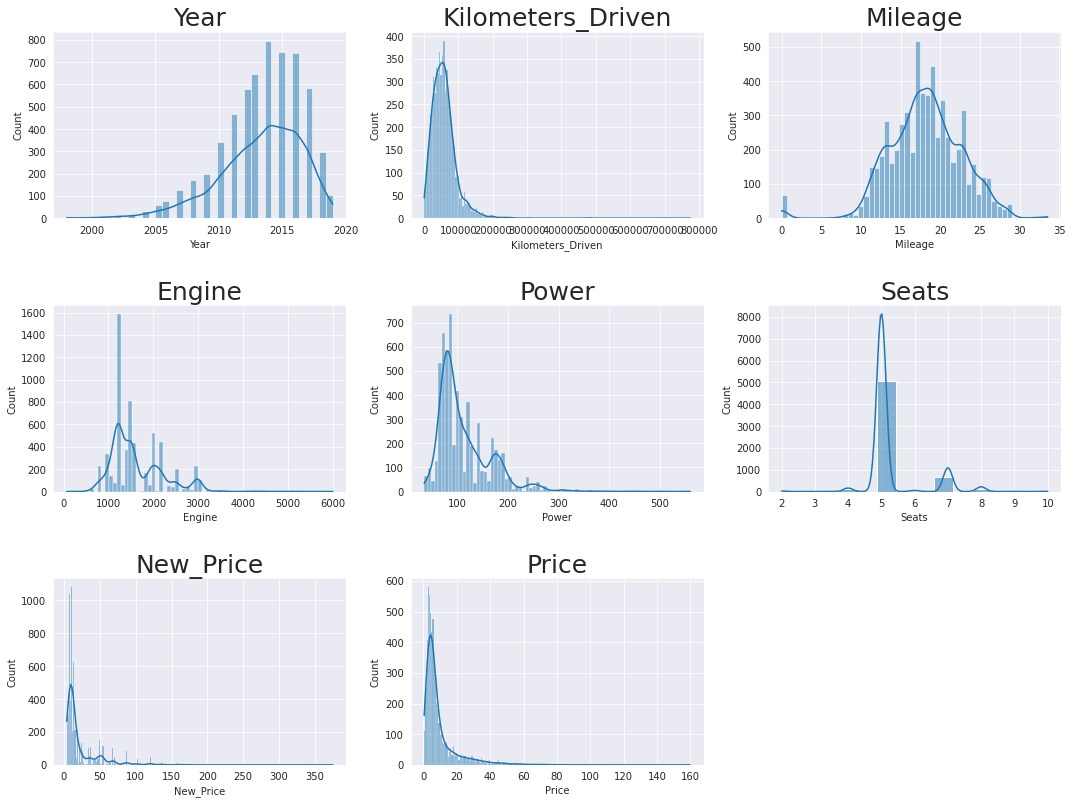

In [96]:
# let's plot a histogram of all non-tag columns
plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    # plt.hist(df[dist_cols[i]], bins=50)
    sns.histplot(data=df, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout(h_pad=3)
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* *We see that most of the columns have a very skewed distribution.*
* *We will apply the log transformation to all but the `Year` and `Price` columns to deal with the skewness in the data.*

In [97]:
# creating a copy of the dataframe
df2 = df.copy()

# removing `Year`, `New_Price`, and `Price`
dist_cols.remove("Year")
dist_cols.remove("Price")

# also dropping the `Mileage` column as it is almost normally distributed
dist_cols.remove("Mileage")

# resultant `dist_cols`
dist_cols

['Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price']

In [98]:
# using log transforms on some columns
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Price,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log
0,Mumbai,2010,Other_Fuels,Manual,First,26.60,1.75,11.184435,6.906755,4.080246,1.791759,1.873339
1,Pune,2015,Diesel,Manual,First,19.67,12.50,10.621352,7.367077,4.845761,1.791759,2.836737
2,Chennai,2011,Petrol,Manual,First,18.20,4.50,10.736418,7.090077,4.496471,1.791759,2.262804
3,Chennai,2012,Diesel,Manual,First,20.77,6.00,11.373675,7.130099,4.497139,2.079442,2.507157
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,17.74,10.613271,7.585281,4.954418,1.791759,3.991573


In [99]:
# creating an updated list of numeric columns
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns
]
dist_cols

['Year',
 'Mileage',
 'Price',
 'Kilometers_Driven_log',
 'Engine_log',
 'Power_log',
 'Seats_log',
 'New_Price_log']

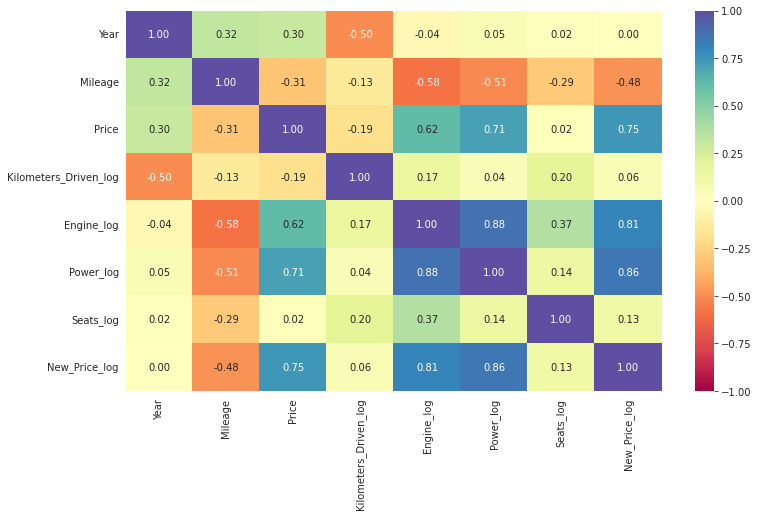

In [100]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df2[dist_cols].corr(), annot=True, vmin=-1, vmax=1, 
    fmt=".2f", cmap="Spectral"
)
plt.show()

Observation

1. As we observed in the `heat plot` (**correlation matrix**) the variable `Power_log` is too high correlated to `Engine_log`. Keeping this variable within the dataset for creating a Model may result in an `overfitted` model. We will remove the variable `Power_log`. 

2. It is also observed that `New_Price_log` is highly correlated with `Engine_log` and `Power_log`. I have decided to also remove this variable as it may create an `overfit` model not suitable for generalization.


In [101]:
# filtering non-numeric columns
cat_columns = df2.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [102]:
# printing the number of occurrences of each unique value in each categorical column
for column in cat_columns:
    print(df2[column].value_counts())
    print("-" * 50)

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          621
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
--------------------------------------------------
Diesel         3203
Petrol         2746
Other_Fuels      68
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       4299
Automatic    1718
Name: Transmission, dtype: int64
--------------------------------------------------
First            4928
Second            967
Third & Above     122
Name: Owner_Type, dtype: int64
--------------------------------------------------


* Most of the `Location` are in similar number of values per city with the exception of **Ahmedabad**.
* In `Fuel_Type` the category `Other_Fuels` is way lower than other groups.
* For `Transmission` the proportion of `Manual`:`Automatic` is almost 3:1.
* For `Owner_Type` the proportion of `First`:`Second` is higher than 5:1. The proportion `Second`:`Third & Above` is greater than 7:1.

In [103]:
# rearrange columns in df2: not including 'Power_log' and 'New_Price_log'
df2_cols = ['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 
            'Mileage', 'Kilometers_Driven_log', 'Engine_log', 
            'Seats_log', 'Price']
df2 = df2[df2_cols].copy()

In [104]:
df2

,Year,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Kilometers_Driven_log,Engine_log,Seats_log,Price
0,2010,Mumbai,Other_Fuels,Manual,First,26.60,11.184435,6.906755,1.791759,1.75
1,2015,Pune,Diesel,Manual,First,19.67,10.621352,7.367077,1.791759,12.50
2,2011,Chennai,Petrol,Manual,First,18.20,10.736418,7.090077,1.791759,4.50
3,2012,Chennai,Diesel,Manual,First,20.77,11.373675,7.130099,2.079442,6.00
4,2013,Coimbatore,Diesel,Automatic,Second,15.20,10.613271,7.585281,1.791759,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,Delhi,Diesel,Manual,First,28.40,10.217057,7.130099,1.791759,4.75
6015,2015,Jaipur,Diesel,Manual,First,24.40,11.512935,7.021976,1.791759,4.00
6016,2012,Jaipur,Diesel,Manual,Second,14.00,10.915107,7.823646,2.197225,2.90
6017,2013,Kolkata,Petrol,Manual,First,18.90,10.736418,6.906755,1.791759,2.65


## **Model Building**

We will build one model using the target variable `Price` and another model using `Price_log` and will compare the results to see which approach is more fit for the task.

## **Case Using Regular `Price`**

### Define independent and dependent variables

In [105]:
X = df2.drop(["Price"], axis=1)
y = df2["Price"]

### Creating Dummy variables

In [106]:
# creating dummy variables from categorical and object variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Year,Mileage,Kilometers_Driven_log,Engine_log,Seats_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Other_Fuels,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above
0,2010,26.60,11.184435,6.906755,1.791759,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,2015,19.67,10.621352,7.367077,1.791759,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2011,18.20,10.736418,7.090077,1.791759,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,2012,20.77,11.373675,7.130099,2.079442,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2013,15.20,10.613271,7.585281,1.791759,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [107]:
# dimensions of the transformed predictor (independent) dataset
print(f"The dataset of independent variables contains {X.shape[0]} rows and {X.shape[1]} columns.")

The dataset of independent variables contains 6017 rows and 20 columns.


### Split dataset in Training and Test

In [108]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

In [109]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1806


### Fitting a Linear Model

In [110]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### Coefficients and Intercept learned from the Linear Model

In [111]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.777161
Mileage,-0.241407
Kilometers_Driven_log,-2.664193
Engine_log,17.285910
Seats_log,-18.592683
Location_Bangalore,1.573869
Location_Chennai,0.273743
Location_Coimbatore,2.802603
Location_Delhi,-0.450839
Location_Hyderabad,1.960298


Observations

## Model Performance Check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function that will print out all the above metrics in one go.

### Function **model_performance_regression**

In [112]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute sMAPE (symmetric MAPE)
def smape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / ((np.abs(targets) + np.abs(predictions))/2.00)) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    smape = smape_score(target, pred)  # to compute symmetric MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
            "sMAPE": smape
        },
        index=[0],
    )

    return df_perf

### **Model Performance on Training**

In [113]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, 
                                                        x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE,sMAPE
0,6.851574,4.258692,0.627927,0.626151,87.776926,61.915962


### **Model Performace on Testing**

In [114]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, 
                                                       x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE,sMAPE
0,6.741615,4.275733,0.624843,0.62064,81.001135,60.341019


## **Case using $Log(Price)$**

### Define independent and dependent variables

In [115]:
X = df2.drop(["Price"], axis=1)
y = np.log(df2["Price"])

### Creating Dummy variables

In [116]:
# creating dummy variables from categorical and object variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Year,Mileage,Kilometers_Driven_log,Engine_log,Seats_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Other_Fuels,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third & Above
0,2010,26.60,11.184435,6.906755,1.791759,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,2015,19.67,10.621352,7.367077,1.791759,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2011,18.20,10.736418,7.090077,1.791759,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,2012,20.77,11.373675,7.130099,2.079442,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2013,15.20,10.613271,7.585281,1.791759,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [117]:
# dimensions of the transformed predictor (independent) dataset
print(f"The dataset of independent variables contains {X.shape[0]} rows and {X.shape[1]} columns.")

The dataset of independent variables contains 6017 rows and 20 columns.


### Split dataset in Training and Test

In [118]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

In [119]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1806


### Fitting a Linear Model

In [120]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### Coefficients and Intercept learned from the Linear Model

In [121]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.117708
Mileage,-0.007291
Kilometers_Driven_log,-0.109659
Engine_log,1.464289
Seats_log,-0.636853
Location_Bangalore,0.149901
Location_Chennai,-0.026196
Location_Coimbatore,0.096979
Location_Delhi,-0.068154
Location_Hyderabad,0.110836


### **Model Performance on Training**

In [122]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, 
                                                        x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE,sMAPE
0,0.328515,0.249132,0.860521,0.859855,inf,19.388589


Observation

* The **Mean Absolute Percentage Error** `(MAPE)` on `training` is giving `inf` value. This is expected as there are extreme outliers in the dataset. Those `outliers` are reasonable numbers as we saw earlier but can't be managed by the `MAPE` metric.

* `MAPE` takes undefined values when there are zero values for the actuals. Additionally, it takes extreme values when the actuals are very close to zero. So this results are expected for our case.

* With the use of Symmetric-`MAPE` we overcome this limitation and is a better indicator for **Mean Absolute Percentage Error**. Whenever the actual value or the `predicted` has the value of 0 or close to 0, sMAPE will automatically hit the upper boundary value = 200%.  We should remember though that the values of standard `MAPE` may exceed 100%.

* $R^2$ explain the variance of the model upto **86%** percent of the time on training data. In addition, Adjusted-$R^2$ is almost **86%** too.

### **Model Performance on Testing**

In [123]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, 
                                                       x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE,sMAPE
0,0.340461,0.248641,0.842778,0.841016,inf,18.200778


Observation

* We get again a **Mean Absolute Percentage Error** `(MAPE)` on `testing` as an `inf` value. This is expected as there are extreme outliers in the dataset. Those `outliers` are reasonable numbers as seen before but can't be managed by the `MAPE` metric.

* The `sMAPE` overcomes the limitations of `MAPE` and we are getting errors in the same ball park number and lower than in the `training` set which is a good indication of not `overfitting`.

* $R^2$ explain the variance of the model upto **84%** percent of the time on `testing` data. In addition, Adjusted-$R^2$ is also **84%** too. This indicates `the model is able to generalize` and **not overfitted**.

## **Actionable Insights and Recommendations**

### **Insights**

We analyzed a dataset of 7,253 records including 14 variables for the `Cars4U` Project.

The main feature of interest here is the `Price`. We wanted to **'profile'** a model so we can predict what would be the `Price` for used cars in those dealerships.

Having the the Prediction Model at hand we will be able to differencially `price` the right amount **for the float of used cars in the dealership**.

We were able to run two scenarios where in the first scaneraio we run the learning process of the model using the **`regular`** $Price$ variable as a target without applying any transformation and a second scenario where we utilized a **`engineered`** variable $log(Price)$.

### Introducing a new metric $sMAPE$

The mean absolute percentage error (MAPE) is one of the most widely used measures of forecast accuracy, due to its advantages of scale-independency and interpretability. However, MAPE has the significant disadvantage that it produces infinite or undefined values for zero or close-to-zero actual values.

If the actual values are very small (usually less than one), MAPE yields extremely large percentage errors (outliers), while zero actual values result in infinite MAPEs.

sMAPE is defined equivalently to the metric adjusted MAPE (without the absolute values in the denominator) and fixes the shortcoming of the original MAPE — it has both the lower (0%) and the upper (200%) bounds.

### First Scenario

This **`regular`** Model provided the following metrics:

**Model Performance on Training**

$$RMSE = 6.8516, MAE = 4.2586, R^2 = 0.6279, Adj. R^2 = 0.6262, MAPE = 87.78, and sMAPE = 61.92$$

**Model Performance on Testing**

$$RMSE = 6.7416, MAE = 4.2757, R^2 = 0.6248, Adj. R^2 = 0.6206, MAPE = 81.00, and sMAPE = 60.34$$

### Second Scenario

On the second scenario we run a `engineered` variable $log(Price)$ and we obtained the following results:

**Model Performance on Training**

$$RMSE = 0.3285, MAE = 0.2491, R^2 = 0.8605, Adj. R^2 = 0.8598, MAPE = inf, and sMAPE = 19.3886$$

* The **Mean Absolute Percentage Error** `(MAPE)` on `training` is giving `inf` value. This is expected as there are extreme outliers in the dataset. Those `outliers` are reasonable numbers as we saw earlier but can't be managed by the `MAPE` metric.

* `MAPE` takes undefined values when there are zero values for the actuals. Additionally, it takes extreme values when the actuals are very close to zero. So this results are expected for our case.

* With the use of Symmetric-`MAPE` we overcome this limitation and is a better indicator for **Mean Absolute Percentage Error**. Whenever the actual value or the `predicted` has the value of 0 or close to 0, sMAPE will automatically hit the upper boundary value = 200%.  We should remember though that the values of standard `MAPE` may exceed 100%.

* $R^2$ explain the variance of the model upto **86%** percent of the time on training data. In addition, Adjusted-$R^2$ is almost **86%** too.

**Model Performance on Testing**

$$RMSE = 0.3404, MAE = 0.2486, R^2 = 0.8428, Adj. R^2 = 0.8410, MAPE = inf, and sMAPE = 18.2008$$

We get again a Mean Absolute Percentage Error (MAPE) on testing as an inf value. This is expected as there are extreme outliers in the dataset. Those outliers are reasonable numbers as seen before but can't be managed by the MAPE metric.

The sMAPE overcomes the limitations of MAPE and we are getting errors in the same ball park number and lower than in the training set which is a good indication of not overfitting.

𝑅2  explain the variance of the model upto 84% percent of the time on testing data. In addition, Adjusted- 𝑅2  is also 84% too. This indicates the model is able to generalize and not overfitted.

### **Recommendations to business**

1. The proposed Model using $log(Price)$ provides a fairly accurate estimation of the errors @ 84% ($R^2 = 0.8428$) and therefore an stable and easy to productionize solution to predict the `Price` of used cars at `Cars4U` dealership. 

2. The proposed Model could be continuaously improved by possible introducing some penalization in the Model like using Linear regression with combined L1 and L2 priors as regularizer and Linear regression with Cross Validation from sklearn.

3. Evaluate the results of possibly applying those changes and see if the model is still simple enough and able to generalize correctaly in new situations.